# **Desafio Data Analyst - Bitcoin Tweets**

### <a name=indice>**Índice**</a>

* [Introdução](#introducao)
* [Desenvolvimento - Perfil dos usuários](#desenvolvimento_perfil)
* [Conclusão Perfil](#conclusao_perfil)
* [Desenvolvimento - Análise de sentimentos](#desenvolvimento_sentimento)
* [Conclusão Análise de Sentimentos](#conclusao_sentimento)


### <a name=introducao>**Introdução**</a>
[Voltar ao índice](#indice)

De acordo com o próprio Twitter, o objetivo da rede social é ser um serviço aberto que promove a conversa pública. 
<br>A ideia desse trabalho é utilizar uma base contendo dados dessas conversas públicas relacionados ao Bitcoin e extrair informações que nos ajudem a entender os seguintes pontos:
<br>
* Qual o perfil dos usuários que falam sobre Bitcoin;
* Fazer uma análise de sentimento desses tweets, para saber se as pessoas possuem uma percepção positiva ou negativa sobre essa criptomoeda.

A Base que será utilizada é um arquivo CSV que já trás conversas relacionadas ao Bitcoin e está disponível em [www.kaggle.com](https://www.kaggle.com/datasets/226bc93769b5b28697eb8fc4a107040b3145c01640c91c16bde8424170f2820e?resource=download) com o nome Bitcoin_tweets.

### <a name=desenvolvimento_perfil>**Desenvolvimento - Perfil dos usuários**</a>
[Voltar ao índice](#indice)

Para iniciar o estudo, serão importadas as bibliotecas que serão utilizadas e a base de dados.

#### **Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import collections
import warnings
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

###Para funcionamento do textblob instalar:
### pip install -U textblob
### python -m textblob.download_corpora

###Configuração para que o pandas todas as colunas e linhas do dataframe e os dados float com 2 casas decimais 
pd.set_option('display.max_columns', None,'display.max_rows',None,'display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv('Bitcoin_tweets.csv', low_memory=False)

<br>
Em primeiro lugar, vamos observar algumas linhas da base e quantas linhas e colunas ela possui.
<br>

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [4]:
df.shape

(2830476, 13)

<br>
A base possui 13 colunas e 2.830.476 linhas.
<br>Vamos agora observar os tipos de dados de cada coluna e em seguida transforma-los em formatos mais apropriados.
<br><br>

In [5]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers      object
user_friends        object
user_favourites     object
user_verified       object
date                object
text                object
hashtags            object
source              object
is_retweet          object
dtype: object

In [6]:
df['user_created']=pd.to_datetime(df['user_created'],errors='coerce')
df['date']=pd.to_datetime(df['date'],errors='coerce')

In [7]:
numeros=['user_followers','user_friends','user_favourites']
for colunas in numeros:
    df[colunas]=pd.to_numeric(df[colunas], errors='coerce')

In [8]:
df['user_verified']=df['user_verified'].astype('category')
df['is_retweet']=df['is_retweet'].astype('category')

In [9]:
df.dtypes

user_name                   object
user_location               object
user_description            object
user_created        datetime64[ns]
user_followers             float64
user_friends               float64
user_favourites            float64
user_verified             category
date                datetime64[ns]
text                        object
hashtags                    object
source                      object
is_retweet                category
dtype: object

In [10]:
df.describe(include='all',datetime_is_numeric=True)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
count,2830445,1426930,2477796,2830323,2830337.00,2830323.00,2830324.00,2830338,2830323,2830338,2813293,2826722,2830035
unique,443138,72343,440374,NaN,NaN,NaN,NaN,17,NaN,2765188,643625,2151,1
top,Hoba Bot,United States,"Market analysis & recaps, scalping leverage ca...",NaN,NaN,NaN,NaN,False,NaN,💸 Earn free #BTC and multiply crypto up to 15%...,['Bitcoin'],Twitter for Android,False
freq,13137,33999,18887,NaN,NaN,NaN,NaN,2811674,NaN,1304,358178,850008,2830035
mean,NaN,NaN,NaN,2018-06-07 14:33:21.719369984,8225.36,1198.51,6580.72,NaN,2021-10-22 17:11:43.288933376,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1970-01-01 00:00:00,0.00,0.00,0.00,NaN,2021-02-05 10:52:04,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2016-01-06 17:56:37,45.00,55.00,86.00,NaN,2021-07-30 17:24:05.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2020-06-02 05:21:16,205.00,235.00,712.00,NaN,2021-10-22 10:34:14,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021-05-27 07:48:28,1227.00,807.00,3826.00,NaN,2022-01-14 22:00:26,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2022-04-16 21:54:50,24131346.00,4201104.00,1248517.00,NaN,2022-04-16 23:59:51,NaN,NaN,NaN,NaN


#### **Usuários**

<br>
Vamos iniciar a análise observando os dados de usuários. A partir da descrição dos dados, vemos que existem 2.830.445 entradas de nomes de usuários, mas quando observamos o nome mais frequente vemos que esse usuário foi responsável por 13.137 tweets. 
<br>Vamos avaliar a quantidade de tweets dos usuários que mais postaram e ver quanto esses tweets representam do total. Vamos observar a quantidade de tweets de 20% dos usuários com maior quantidade de mensagens.
<br>

In [11]:
amostra=int(0.2*len(df['user_name'].unique()))

In [12]:
print(amostra)

88627


Considerando uma amostra de 88.627 usuários, conseguimos separar a quantidade de tweets de cada um deles.

In [13]:
usuarios_ativos=dict(collections.Counter(df['user_name']).most_common(amostra))

Somando os tweets desses usuários, chegamos no valor abaixo:

In [14]:
valores=sum(usuarios_ativos.values())

In [15]:
print(valores)

2299479


Dividindo o total de tweets desses usuários pelo total de tweets, chegamos no seguinte valor:

In [16]:
percent=valores/len(df)
print(f"\nEsses usuários foram responsáveis por {percent*100:.2f}% dos tweets")


Esses usuários foram responsáveis por 81.24% dos tweets


Vamos verificar as estatísticas somente desses usuários.

In [17]:
df_usuarios_ativos=pd.DataFrame(usuarios_ativos.items(), columns=['usuario','quantidade'])

In [18]:
df_usuarios_ativos.head()

,usuario,quantidade
0,Hoba Bot,13137
1,Bitcoin_Whale_Alert,11439
2,Brett Murphy,11150
3,ExchangeWhales🐋,10855
4,BitcoinAgile,10396


In [19]:
df_usuarios_ativos.describe()

,quantidade
count,88627.00
mean,25.95
std,157.96
min,4.00
25%,6.00
50%,9.00
75%,18.00
max,13137.00


Apenas para ilustrar a representatividade, vamos observar o top 50 usuários com mais tweets.

In [20]:
top_50_usuarios=dict(collections.Counter(df['user_name']).most_common(50))

In [21]:
print(top_50_usuarios)

{'Hoba Bot': 13137, 'Bitcoin_Whale_Alert': 11439, 'Brett Murphy': 11150, 'ExchangeWhales🐋': 10855, 'BitcoinAgile': 10396, 'Live Price Crypto': 8901, 'Bitcoin updates': 8767, 'CoinOK': 7708, 'Cryptocurrency prices (real-time)': 7088, 'tictoknextblock': 7032, 'DYOR.net': 6993, 'brettmurphynet': 6322, 'Crypto Volume': 6215, 'BlockScan': 5955, 'Volume Alerts': 5734, '#Help Me Pay My Bills': 5576, 'Bitswings': 5366, 'Whale Transactions': 5311, 'ali barrera': 5073, 'Bitcoin Price': 4953, 'BEARWHALE 🐳': 4759, 'CryptoSquawk': 4694, 'CryptoCharts': 4669, 'ClankApp - Crypto Whales Tracker 🐳': 4579, 'MTN': 4436, 'WhaleTrades 🐳': 4399, 'BitcoinTracker': 4395, 'Job Preference': 4080, 'DYOR.net Dev & Bot': 3977, 'इंडिया क्रिप्टोक्यूरेंसी बिटकाइन': 3754, 'Bitcoin⚡️': 3737, 'BetFast.com': 3727, 'Mempool Whales 🐋': 3616, 'BTC情報アラート📊': 3577, 'MarketCharts': 3495, '₿itcoin Bot🤖': 3384, 'crypto&NFT&Metaverse news': 3343, 'Everything crypto': 3323, 'Bitcoin Bot🤖': 3280, 'thinkmoon.io 🇺🇦🇺🇦| Latest crypto tr

In [22]:
df_top_50=pd.DataFrame(top_50_usuarios.items(), columns=['usuarios','quantidade'])

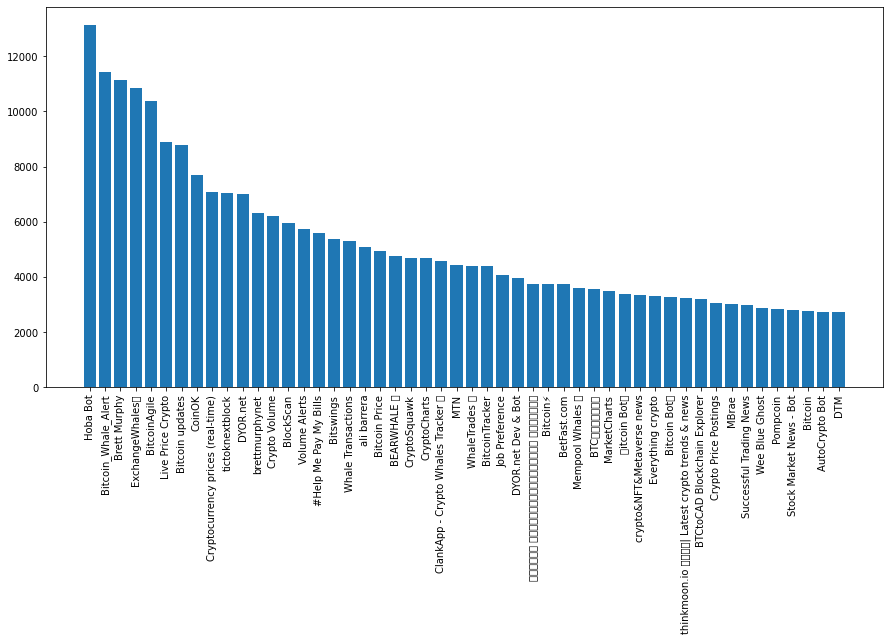

In [23]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,7))
plt.bar(df_top_50['usuarios'], df_top_50['quantidade'])
plt.xticks(rotation=90)
plt.show()

#### **Localidade**

Para avaliar a localidade, vamos primeiro observar os 30 locais mais comuns.

In [24]:
localidades=dict(collections.Counter(df['user_location']).most_common(30))

In [25]:
sum(localidades.values())

1757509

In [26]:
localidades

{nan: 1403546,
 'United States': 33999,
 'New York, USA': 20625,
 'London, England': 19262,
 'Bay Area, CA': 18019,
 'Global': 17077,
 'Blockchain': 15619,
 'Worldwide': 14555,
 'India': 14052,
 'Moon': 13511,
 'Canada': 13070,
 'United Kingdom': 13048,
 'Internet': 12534,
 'Australia': 12432,
 'USA': 12159,
 'Earth': 11126,
 'Dhaka, Bangladesh': 11084,
 "Matter Doesn't Matter": 10396,
 'Metaverse': 10268,
 'Los Angeles, CA': 9245,
 'Seattle, WA': 8240,
 'New York, NY': 7744,
 'Bangladesh': 7495,
 'England, United Kingdom': 7482,
 'California, USA': 7284,
 'London': 7072,
 'Singapore': 6996,
 'Mars': 6785,
 'server': 6664,
 'MOON': 6120}

Vemos que mais da metade dos tweets são sem localização definida. Das localizações que podemos identificar, destacam-se EUA, Reino Unido, Índia, Canada e Austrália.

#### **Criação do Usuário**

Para observar as datas de criação do usuário, vamos criar um novo dataframe com apenas os anos de criação de cada usuário.

In [27]:
df_idade = df[['user_created']].copy()

In [28]:
df_idade['ano'] = df['user_created'].dt.year

In [29]:
df_idade.describe()

,ano
count,2830323.00
mean,2017.95
std,3.94
min,1970.00
25%,2016.00
50%,2020.00
75%,2021.00
max,2022.00


Vemos que temos entradas com valor 1970, o que não faz sentido. Vamos remover as datas de criação inferiores à 2006, ano de criação do Twitter.

In [30]:
df_idade.dropna(axis=1, how='all')
df_idade_filtro=df_idade.loc[df_idade['ano'] >= 2006]

In [31]:
df_idade_filtro.describe()

,ano
count,2830316.00
mean,2017.95
std,3.94
min,2006.00
25%,2016.00
50%,2020.00
75%,2021.00
max,2022.00


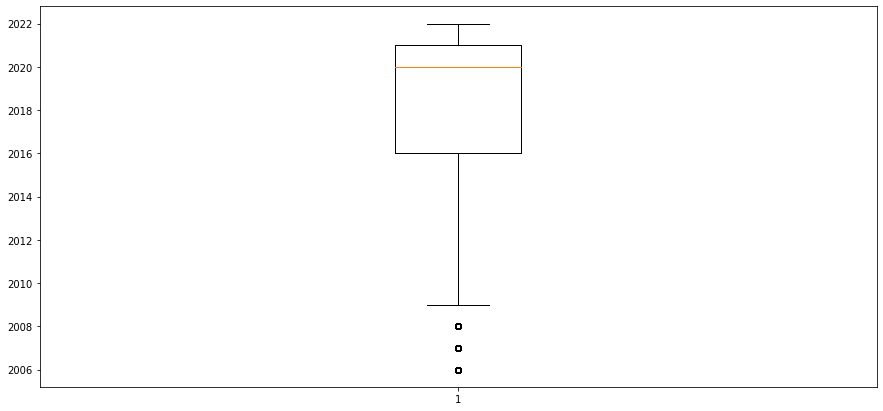

In [32]:
plt.figure(figsize=(15,7))
plt.boxplot(df_idade_filtro['ano'])
plt.show()

O Boxplot nos ajuda a entender que a maior parte dos tweets foram gerados de contas criadas a partir de 2016.

#### **Seguidores, Amigos e Favoritos**

Para este caso, vamos utilizar os usuários da amostra que coletamos para o estudo de usuários.

In [33]:
usuarios_amostra=list(usuarios_ativos.keys())

In [34]:
df_seguidores = df[['user_name','user_followers', 'date']].copy()

In [35]:
df_seg_filtro=df_seguidores.loc[df_seguidores['user_name'].isin(usuarios_amostra)].sort_values(by='date',ascending=False)

In [36]:
df_seg_filtro=df_seg_filtro.drop_duplicates(subset='user_name')

In [37]:
df_seg_filtro.describe()

,user_followers
count,88624.00
mean,6047.01
std,151581.28
min,0.00
25%,42.00
50%,164.00
75%,813.00
max,24131346.00


Ao filtrar os usuários que estavam na amostra contendo os que mais criaram tweets e removendo os dados duplicados, vemos que na média os usuários possuem 22.567 seguidores. A conta que mais possui seguidores tem mais de 24 milhões de seguidores.

In [38]:
df_seg_filtro.sort_values(by='user_followers',ascending=False).head(10)

,user_name,user_followers,date
1973855,Reuters,24131346.00,2021-12-30 19:20:00
2317153,Forbes,17477087.00,2022-02-18 23:21:39
1899505,NDTV,16370108.00,2021-11-25 13:33:08
1282168,CGTN,13453069.00,2021-10-18 22:05:46
365296,TIMES NOW,10047481.00,2021-07-23 12:40:00
2728248,Binance,8377226.00,2022-04-15 23:00:11
2154959,Hindustan Times,8369164.00,2022-01-22 12:42:17
1521661,Bloomberg,7623470.00,2021-10-29 01:48:09
2095446,IndiaToday,5920167.00,2022-01-12 10:02:23
2161597,Zee News English,5547619.00,2022-01-22 10:25:00


Vemos que as contas de grandes canais de mídia são as com mais seguidores.

De maneira similar, vamos ver os dados de amigos.

In [39]:
df_amigos = df[['user_name','user_friends','date']].copy()

In [40]:
df_ami_filtro=df_amigos.loc[df_amigos['user_name'].isin(usuarios_amostra)].sort_values(by='date',ascending=False)

In [41]:
df_ami_filtro=df_ami_filtro.drop_duplicates(subset='user_name')

In [42]:
df_ami_filtro.describe()

,user_friends
count,88624.00
mean,979.22
std,4029.77
min,0.00
25%,105.00
50%,346.00
75%,979.25
max,442557.00


Fazendo os mesmos filtros que feitos anteriormente, as contas possuem em média 1087 amigos e a conta que mais possui amigos tem 446.893 amigos.

In [43]:
df_ami_filtro.sort_values(by='user_friends',ascending=False).head(10)

,user_name,user_friends,date
1822144,Beef Ent.,442557.00,2021-11-19 07:15:45
2474798,Warren Whitlock,379087.00,2022-03-17 20:55:02
2005961,Evan Kirstel #TechFluencer,280286.00,2022-01-14 19:40:02
1490737,Evan Kirstel #B2B #TechFluencer,279393.00,2021-10-29 22:44:20
1128363,Evan Kirstel the $B2B Techfluencer,277744.00,2021-08-25 13:43:08
78983,🟣 Evan Kirstel $B2B,275416.00,2021-04-23 16:58:36
358256,❂ Yübbîę Umoh ❂,269410.00,2021-07-23 22:12:16
2791888,Herbert R. Sim,183412.00,2022-04-14 17:27:16
2706152,"Trade Alerts, Trade Ideas and Crypto 🇺🇸",154518.00,2022-04-16 17:18:19
2168268,YesPunjab.com (For Punjabi follow @BawaHs),148274.00,2022-01-22 08:11:33


No caso de amigos, as contas de pessoas físicas são as que mais possuem.

No caso dos favoritos, vamos seguir a mesma linha utilizada anteriormente.

In [44]:
df_favoritos = df[['user_name','user_favourites','date']].copy()

In [45]:
df_fav_filtro=df_favoritos.loc[df_favoritos['user_name'].isin(usuarios_amostra)].sort_values(by='date',ascending=False)

In [46]:
df_fav_filtro=df_fav_filtro.drop_duplicates(subset='user_name')

In [47]:
df_fav_filtro.describe()

,user_favourites
count,88624.00
mean,7321.08
std,21931.55
min,0.00
25%,280.00
50%,1331.00
75%,5247.50
max,1152480.00


In [48]:
df_fav_filtro.sort_values(by='user_favourites',ascending=False).head(10)

,user_name,user_favourites,date
2144619,Art Vandelay,1152480.00,2022-01-22 16:27:01
2700363,IBookery,1001165.00,2022-04-16 21:16:55
1999686,Jake Hamby 💾🧙,903096.00,2022-01-14 23:51:02
1922096,Support Kids with ASD🥰💞😍😘🤗,846421.00,2021-11-24 20:57:21
2470867,Crypto (DJ) Prestige,803786.00,2022-03-18 14:09:08
2005961,Evan Kirstel #TechFluencer,588985.00,2022-01-14 19:40:02
1490737,Evan Kirstel #B2B #TechFluencer,588453.00,2021-10-29 22:44:20
1128363,Evan Kirstel the $B2B Techfluencer,587570.00,2021-08-25 13:43:08
360913,despair haver,546338.00,2021-07-23 15:02:20
1822144,Beef Ent.,527186.00,2021-11-19 07:15:45


De maneira similar ao de amigos, as contas de pessoas físicas são as que mais possuem.

#### **Usuários Verificados**

Vamos criar um dataframe contendo apenas as colunas de nome de usuário e usuários verificados. A partir das estatísticas descritivas feitas com o dataframe completo, é possível observar que existem 17 valores unicos para a coluna de verificação, sendo que se esperava apenas "True" ou "False". Vamos ver os valores únicos dessa coluna para entender melhor.

In [49]:
df_verificados = df[['user_name','user_verified','date']].copy()

In [50]:
df_verificados['user_verified'].unique()

['False', 'True', '@krakenfx  #ETH #BTC  If you want to become p..., 'Official ESHOP Airdrop. If You Missed Meme To..., '@pufferswap Nice project\n\n@karnoto_hendrik ..., ..., 'DocumentingBTC: #bitcoin at $30: "Am I too la..., 'Crypto Market\nOpen your Free Angel One Accou..., '35', '💸 Earn free #BTC and multiply crypto up to 15..., NaN]
Length: 18
Categories (17, object): ['#btc to the moon 🚀🚀 46059', '#btc to the moon 🚀🚀 77774', '35', '@DogCakeFinance @DogCakeFinance Great project..., ..., 'Official ESHOP Airdrop. If You Missed Meme To..., 'True', '💸 Earn free #BTC and multiply crypto up to 15..., '🤯Mind-blowing 99.7% of all Bitcoin holders ar...]

In [51]:
verificacao=["True", "False"]

In [52]:
df_ver_filtro=df_verificados.loc[df_verificados['user_verified'].isin(verificacao)].sort_values(by='date',ascending=False)

In [53]:
df_ver_filtro=df_ver_filtro.drop_duplicates(subset='user_name')

In [54]:
df_ver_filtro.describe()

,user_name,user_verified,date
count,443043,443044,443044
unique,443043,2,416595
top,USD hegemony ⚡️,False,2021-07-26 11:50:35
freq,1,439824,22
first,NaN,NaN,2021-02-05 11:27:34
last,NaN,NaN,2022-04-16 23:59:51


In [55]:
df_ver_filtro_true=df_verificados.loc[df_verificados['user_verified']=="True"].drop_duplicates(subset='user_name')

In [56]:
df_ver_filtro_true.count()

user_name        3307
user_verified    3307
date             3307
dtype: int64

In [57]:
df_ver_filtro_false=df_verificados.loc[df_verificados['user_verified']=="False"].drop_duplicates(subset='user_name')

In [58]:
df_ver_filtro_false.count()

user_name        440056
user_verified    440057
date             440057
dtype: int64

Concluímos que a maior parte das contas não são de usuários verificados.

#### **Origem**

A coluna de origem trás a informação se o usuário estava utilizando o aplicativo para celular, desktop e qual o sistema operacional. Existem mais de 2.000 valores distintos nessa coluna, o que também chama a atenção.

In [59]:
df_origem = df[['user_name','source','date']].copy()

In [60]:
df_origem['source'].unique()

array(['Twitter Web App', 'Twitter for Android', 'dlvr.it', ..., 'Pilhei',
       'justinT8', 'Cualon__'], dtype=object)

In [61]:
origens=dict(collections.Counter(df['source']).most_common(50))

In [62]:
origens

{'Twitter for Android': 850008,
 'Twitter Web App': 728500,
 'Twitter for iPhone': 542216,
 'IFTTT': 42345,
 'dlvr.it': 32564,
 'TweetDeck': 22062,
 'ContentStudio.io': 21602,
 'Twitter for iPad': 17297,
 'HoBaBot': 13137,
 'Hootsuite Inc.': 11795,
 'Bitcoin Whale Alert': 11439,
 'DYORCryptoBot': 10960,
 'exchangewhales': 10855,
 'Buffer': 10719,
 'bitcoinagile': 10388,
 'Twibble.io': 9802,
 'CoinTweety': 9632,
 'vaiotapi': 8901,
 'Pamboo Crypto': 8132,
 'TwinyBots': 7873,
 'Microsoft Power Platform': 7665,
 'Cryptocurrency Live Prices': 7088,
 'tictoknextblock': 7032,
 'Zapier.com': 6726,
 'IAmBitcoinBot': 6664,
 'abnormal_crypto_app': 6215,
 'SocialDog for Twitter': 5979,
 'BlockScan': 5955,
 'Crypto Volume Details': 5734,
 'Revive Social App': 5401,
 'BitSwingsTwit': 5366,
 'BTC Status Bot': 4930,
 'bearwhale': 4757,
 'thinkmoon-v1.1': 4752,
 'watchinwhales': 4731,
 'CryptoSquawkBot': 4693,
 'CryptoCharts Feed': 4669,
 'ClankApp': 4579,
 'Cheap Bots, Done Quick!': 4460,
 'Bitmex Hig

É interessante observar que os aplicativos oficiais do Twitter, como Twitter para Android e Twitter para iPhone, por exemplo, são as origens mais comuns, porém é possível observar que muitas dessas origens são de bots ou APIs. É possível separar essas origens para observar melhor quais são.

In [63]:
origem_fonte=list(origens.keys())

In [64]:
origem_fonte=[str(x).lower() for x in origem_fonte]

In [65]:
origem_fonte

['twitter for android',
 'twitter web app',
 'twitter for iphone',
 'ifttt',
 'dlvr.it',
 'tweetdeck',
 'contentstudio.io',
 'twitter for ipad',
 'hobabot',
 'hootsuite inc.',
 'bitcoin whale alert',
 'dyorcryptobot',
 'exchangewhales',
 'buffer',
 'bitcoinagile',
 'twibble.io',
 'cointweety',
 'vaiotapi',
 'pamboo crypto',
 'twinybots',
 'microsoft power platform',
 'cryptocurrency live prices',
 'tictoknextblock',
 'zapier.com',
 'iambitcoinbot',
 'abnormal_crypto_app',
 'socialdog for twitter',
 'blockscan',
 'crypto volume details',
 'revive social app',
 'bitswingstwit',
 'btc status bot',
 'bearwhale',
 'thinkmoon-v1.1',
 'watchinwhales',
 'cryptosquawkbot',
 'cryptocharts feed',
 'clankapp',
 'cheap bots, done quick!',
 'bitmex high trades',
 '0xनमस्ते',
 'bitcoin cmo',
 'bitcointrackerbtc',
 'nan',
 'twitterbot-6/15/21',
 'mempoolbot',
 'marketchartsapp',
 'btctocad',
 'autotweet1976',
 'twitter for mac']

In [66]:
bot_api = filter(lambda origem: True if ("bot" in origem or "api"in origem) else False, origem_fonte)

In [67]:
print(list(bot_api))

['hobabot', 'dyorcryptobot', 'vaiotapi', 'twinybots', 'zapier.com', 'iambitcoinbot', 'btc status bot', 'cryptosquawkbot', 'cheap bots, done quick!', 'twitterbot-6/15/21', 'mempoolbot']


#### **Criação do Tweet**

Para observar as datas de criação do tweet, vamos criar um novo dataframe com apenas os anos de criação do tweet, de maneira similar ao feito para as datas de criação das contas.

In [68]:
df_data = df[['date']].copy()

In [69]:
df_data['ano'] = df['date'].dt.year

In [70]:
df_data.describe()

,ano
count,2830323.00
mean,2021.29
std,0.46
min,2021.00
25%,2021.00
50%,2021.00
75%,2022.00
max,2022.00


Vemos que todos os tweets foram gerados em 2021 e 2022.

### <a name=conclusao_perfil>**Conclusão Perfil**</a>
[Voltar ao índice](#indice)

Entendemos dos dados que: 
* Aproximadamente 20% dos usuários são responsáveis por mais de 80% dos tweets; 
* A maioria dos tweets não tem localização definida, mas os que possuem são principalmente de EUA, Reino Unido, Índia, Canada e Austrália;
* A maior parte dos tweets foram gerados por contas criadas a partir de 2016;
* Na média, os usuários possuem 22.567 seguidores. A conta que mais possui seguidores tem mais de 24 milhões de seguidores, sendo que as contas de grandes canais de mídia são as com mais seguidores;
* As contas possuem em média 1087 amigos e a conta que mais possui amigos tem 446.893. As contas com mais amigos são de pessoas físicas;
* Assim como o número de amigos, as contas com mais favoritos são de pessoas físicas;
* Concluímos que a maior parte das contas não são de usuários verificados;
* É interessante observar que os aplicativos oficiais do Twitter, como Twitter para Android e Twitter para iPhone, por exemplo, são as origens mais comuns, porém é possível observar que muitas dessas origens são de bots ou APIs
* Os tweets são de 2021 ou 2022.

### <a name=desenvolvimento_sentimento>**Desenvolvimento - Análise de sentimentos**</a>
[Voltar ao índice](#indice)

Para fazer a análise de sentimentos, vamos pegar apenas as colunas de texto e de data do dataframe.

In [71]:
df_sent=df[['text','date']].copy()

In [72]:
df_sent.columns=['text','timestamp']

In [73]:
df_sent['dates'] = df_sent['timestamp'].dt.date
df_sent['year'] = df_sent['timestamp'].dt.year

In [74]:
df_sent.head()

,text,timestamp,dates,year
0,Blue Ridge Bank shares halted by NYSE after #b...,2021-02-10 23:59:04,2021-02-10,2021.00
1,"😎 Today, that's this #Thursday, we will do a ""...",2021-02-10 23:58:48,2021-02-10,2021.00
2,"Guys evening, I have read this article about B...",2021-02-10 23:54:48,2021-02-10,2021.00
3,$BTC A big chance in a billion! Price: \487264...,2021-02-10 23:54:33,2021-02-10,2021.00
4,This network is secured by 9 508 nodes as of t...,2021-02-10 23:54:06,2021-02-10,2021.00


O primeiro passo é fazer um tratamento para remover alguns itens não desejados dos textos. Para isso, será criada uma função que será aplicada em todos os tweets.

In [75]:
def limparTwt(tweet):
    tweet = re.sub("#bitcoin", 'bitcoin', tweet) # remove '#' de bitcoin
    tweet = re.sub("#Bitcoin", 'Bitcoin', tweet) # remove '#' de Bitcoin
    tweet = re.sub('#[A-Za-z0-9]+', '', tweet) # remove palavras iniciadas com '#'
    tweet = re.sub('@[A-Za-z0-9]+', '', tweet) # remove palavras iniciadas com '@'
    tweet = re.sub('\\n', '', tweet) # remove '\n'
    tweet = re.sub('http\S+', '', tweet) # remove hyperlinks
    tweet = re.sub('www\S+', '', tweet) # remove hyperlinks
    return tweet

In [76]:
teste_t=df_sent['text'].dropna()

In [77]:
df_sent['tweets_limpos']=teste_t.apply(limparTwt)

In [78]:
df_sent.head()

,text,timestamp,dates,year,tweets_limpos
0,Blue Ridge Bank shares halted by NYSE after #b...,2021-02-10 23:59:04,2021-02-10,2021.00,Blue Ridge Bank shares halted by NYSE after bi...
1,"😎 Today, that's this #Thursday, we will do a ""...",2021-02-10 23:58:48,2021-02-10,2021.00,"😎 Today, that's this , we will do a ""🎬 Take 2""..."
2,"Guys evening, I have read this article about B...",2021-02-10 23:54:48,2021-02-10,2021.00,"Guys evening, I have read this article about B..."
3,$BTC A big chance in a billion! Price: \487264...,2021-02-10 23:54:33,2021-02-10,2021.00,$BTC A big chance in a billion! Price: \487264...
4,This network is secured by 9 508 nodes as of t...,2021-02-10 23:54:06,2021-02-10,2021.00,This network is secured by 9 508 nodes as of t...


Agora criaremos duas colunas utilizando funções do módulo TextBlob : subjetividade e polaridade. 
<br>A subjetividade mede (de 0 à 1) se a frase é uma subjetiva(opinião) ou um fato, sendo quando maior, mais indícios de se tratar de uma opinião.
<br>A polaridade mede (de -1 à 1) se a frase é positiva ou negativa, sendo -1 negativa, 0 neutra e 1 positiva.

In [79]:
def buscaSub(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def buscaPol(tweet):
    return TextBlob(tweet).sentiment.polarity

In [80]:
df_sent_limpo = df_sent['tweets_limpos'].dropna()
df_sent['subjetividade'] = df_sent_limpo.apply(buscaSub)
df_sent['polaridade'] = df_sent_limpo.apply(buscaPol)

In [81]:
df_sent.head(30)

,text,timestamp,dates,year,tweets_limpos,subjetividade,polaridade
0,Blue Ridge Bank shares halted by NYSE after #b...,2021-02-10 23:59:04,2021-02-10,2021.00,Blue Ridge Bank shares halted by NYSE after bi...,0.10,0.00
1,"😎 Today, that's this #Thursday, we will do a ""...",2021-02-10 23:58:48,2021-02-10,2021.00,"😎 Today, that's this , we will do a ""🎬 Take 2""...",0.00,0.00
2,"Guys evening, I have read this article about B...",2021-02-10 23:54:48,2021-02-10,2021.00,"Guys evening, I have read this article about B...",0.00,0.00
3,$BTC A big chance in a billion! Price: \487264...,2021-02-10 23:54:33,2021-02-10,2021.00,$BTC A big chance in a billion! Price: \487264...,0.10,0.00
4,This network is secured by 9 508 nodes as of t...,2021-02-10 23:54:06,2021-02-10,2021.00,This network is secured by 9 508 nodes as of t...,0.10,0.00
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,2021-02-10 23:53:30,2021-02-10,2021.00,💹 Trade on 📌 Enjoy 10% of the Trading fee📌 ...,0.50,0.40
6,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,2021-02-10 23:53:17,2021-02-10,2021.00,&lt;'fire' &amp; 'man'&gt;Bitcoin,0.00,0.00
7,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,2021-02-10 23:52:42,2021-02-10,2021.00,🔄 Prices update in $EUR (1 hour):$BTC - 3708...,0.00,0.00
8,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,2021-02-10 23:52:25,2021-02-10,2021.00,Bitcoin $RSR I know i told you guys the t...,0.00,0.00
9,.@Tesla’s #bitcoin investment is revolutionary...,2021-02-10 23:52:08,2021-02-10,2021.00,.’s bitcoin investment is revolutionary for b...,0.25,-0.06


Vamos agora criar uma coluna que categoriza o tweet de acordo com a polaridade, sendo:
* maior que 0, positivo;
* igual a 0, neutro;
* menor que 0, negativo.

In [82]:
def classificaSent(posit):
    if posit < 0:
        return "negativo"
    elif posit == 0:
        return "neutro"
    else:
        return "positivo"

In [83]:
df_sent['sentimento'] = df_sent['polaridade'].apply(classificaSent)

In [84]:
df_sent.head(30)

,text,timestamp,dates,year,tweets_limpos,subjetividade,polaridade,sentimento
0,Blue Ridge Bank shares halted by NYSE after #b...,2021-02-10 23:59:04,2021-02-10,2021.00,Blue Ridge Bank shares halted by NYSE after bi...,0.10,0.00,neutro
1,"😎 Today, that's this #Thursday, we will do a ""...",2021-02-10 23:58:48,2021-02-10,2021.00,"😎 Today, that's this , we will do a ""🎬 Take 2""...",0.00,0.00,neutro
2,"Guys evening, I have read this article about B...",2021-02-10 23:54:48,2021-02-10,2021.00,"Guys evening, I have read this article about B...",0.00,0.00,neutro
3,$BTC A big chance in a billion! Price: \487264...,2021-02-10 23:54:33,2021-02-10,2021.00,$BTC A big chance in a billion! Price: \487264...,0.10,0.00,neutro
4,This network is secured by 9 508 nodes as of t...,2021-02-10 23:54:06,2021-02-10,2021.00,This network is secured by 9 508 nodes as of t...,0.10,0.00,neutro
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,2021-02-10 23:53:30,2021-02-10,2021.00,💹 Trade on 📌 Enjoy 10% of the Trading fee📌 ...,0.50,0.40,positivo
6,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,2021-02-10 23:53:17,2021-02-10,2021.00,&lt;'fire' &amp; 'man'&gt;Bitcoin,0.00,0.00,neutro
7,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,2021-02-10 23:52:42,2021-02-10,2021.00,🔄 Prices update in $EUR (1 hour):$BTC - 3708...,0.00,0.00,neutro
8,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,2021-02-10 23:52:25,2021-02-10,2021.00,Bitcoin $RSR I know i told you guys the t...,0.00,0.00,neutro
9,.@Tesla’s #bitcoin investment is revolutionary...,2021-02-10 23:52:08,2021-02-10,2021.00,.’s bitcoin investment is revolutionary for b...,0.25,-0.06,negativo


In [85]:
df_sent['sentimento'].value_counts()

positivo    1387419
neutro      1130165
negativo     312892
Name: sentimento, dtype: int64

Vemos que a maior parte dos tweets são positivos e neutros. Vamos observar como os sentimentos mudam conforme os meses do ano.

In [86]:
df_sent['mes']=df_sent['timestamp'].dt.month
df_sent['data']=df_sent['year'].astype(str) +df_sent['mes'].astype(str)

In [90]:
df_sent.head()

,text,timestamp,dates,year,tweets_limpos,subjetividade,polaridade,sentimento,mes,data
0,Blue Ridge Bank shares halted by NYSE after #b...,2021-02-10 23:59:04,2021-02-10,2021.00,Blue Ridge Bank shares halted by NYSE after bi...,0.10,0.00,neutro,2.00,2021.02.0
1,"😎 Today, that's this #Thursday, we will do a ""...",2021-02-10 23:58:48,2021-02-10,2021.00,"😎 Today, that's this , we will do a ""🎬 Take 2""...",0.00,0.00,neutro,2.00,2021.02.0
2,"Guys evening, I have read this article about B...",2021-02-10 23:54:48,2021-02-10,2021.00,"Guys evening, I have read this article about B...",0.00,0.00,neutro,2.00,2021.02.0
3,$BTC A big chance in a billion! Price: \487264...,2021-02-10 23:54:33,2021-02-10,2021.00,$BTC A big chance in a billion! Price: \487264...,0.10,0.00,neutro,2.00,2021.02.0
4,This network is secured by 9 508 nodes as of t...,2021-02-10 23:54:06,2021-02-10,2021.00,This network is secured by 9 508 nodes as of t...,0.10,0.00,neutro,2.00,2021.02.0


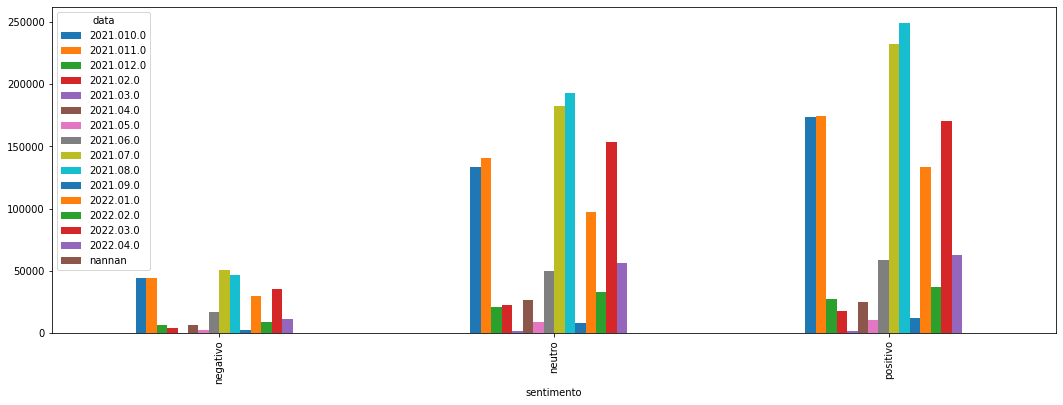

In [91]:
sentimentos_graf = df_sent.groupby(by=['data','sentimento'])['sentimento'].agg(['count'])
sentimentos_graf_pivot = sentimentos_graf.pivot_table(index='sentimento',columns='data',values='count')
sentimentos_graf_pivot.plot.bar(figsize=(18,6))
plt.show()

### <a name=conclusao_sentimento>**Conclusão Análise de Sentimentos**</a>
[Voltar ao índice](#indice)

Podemos concluir que:
* Os sentimentos se comportam de forma parecida: nos meses que o sentimento positivo aumenta, também aumentaram os neutros e negativos;
* No decorrer do tempo, a quantidade de tweets foi aumentando e os sentimentos mantiveram uma relação semelhante.